<a href="https://colab.research.google.com/github/kalinosia/TensorFlow/blob/main/Winter_augum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## United color of Winter czyli wykorzystanie augmentacji zdjęcia
### Cel
Celem wyzwania jest zapoznanie się z technikami augmentacji i wykorzystanie ich na dowolnym zdjęciu.
### Środowisko
Wykorzystaj Jupyter Notebooka i język Pythona
### Opis zadania
Do zadania dołączony jest plik alfons_mucha_winter_1896.jpg Przedstawia on obraz Alfonsa Muchy o tytule "Zima" (https://www.wikiart.org/en/alphonse-mucha/winter-1896). Obraz ten będzie naszym wzorcowym zdjęciem, na którym zastosujemy różne techniki augmentacji.

Skorzystaj z istniejących bibliotek do augmentacji lub napisz własną!
**Zwizualizuj co najmniej 10 wybranych technik augmentacji** wykonanych na załączonym zdjęciu.

**Opisz krótko transformację, jej parametry domyślne i możliwe ustawienia** jeśli występują.

#### Uwaga! Preferowane będzie wykorzystanie augmetacji dostępnych w TensorFlow Object Detection (patrz linki poniżej)
### Wynik
Jako wynik wyzwania należy przesłać notebook zawierający wizualizację zdjęcia oryginalnego i jego augmentacji wraz o opisem tych transformacji.
### Przydatne linki
- Przykładowa biblioteka:

  https://albumentations.ai

- Lista dostępnych augmentacji w TensorFlow Object Detection:

  https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto

- Parametry dostępnych augmentacji w TensorFlow Object Detection:

  https://github.com/tensorflow/models/blob/master/research/object_detection/core/preprocessor.py

## Start

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from functools import partial
import cv2
import random

In [ ]:
tfds.__version__

'4.0.1'

In [ ]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
!wget https://uploads6.wikiart.org/images/alphonse-mucha/winter-1896.jpg!Large.jpg

--2022-01-16 19:07:17--  https://uploads6.wikiart.org/images/alphonse-mucha/winter-1896.jpg!Large.jpg
Resolving uploads6.wikiart.org (uploads6.wikiart.org)... 85.17.39.106
Connecting to uploads6.wikiart.org (uploads6.wikiart.org)|85.17.39.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69103 (67K) [image/jpg]
Saving to: ‘winter-1896.jpg!Large.jpg’

winter-1896.jpg!Lar 100%[===================>]  67.48K   340KB/s    in 0.2s    

2022-01-16 19:07:17 (340 KB/s) - ‘winter-1896.jpg!Large.jpg’ saved [69103/69103]



In [ ]:
!cp winter-1896.jpg!Large.jpg winter1896.jpg

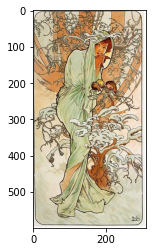

In [ ]:
winter = cv2.imread("winter1896.jpg")
winter=cv2.cvtColor(winter, cv2.COLOR_BGR2RGB)
plt.imshow(winter)
plt.show()

## Visualize functions

In [ ]:
def visualize_image(image):
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
def visualize_2images(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

In [ ]:
def visualize_images(data=[], n=10): #  załóżmy że 10
 
  # create figure
  fig, axes = plt.subplots(int(np.ceil(n/5)),5, figsize=(15,15))

  #  loop over images
  for ax, img in zip(axes.ravel(), data):
      ax.imshow(img)
'''
  f, axarr = plt.subplots(5, int(np.ceil(n/5)))

  axarr[0,0].imshow(image_datas[0])
  axarr[0,1].imshow(image_datas[1])
  axarr[1,0].imshow(image_datas[2])
  axarr[1,1].imshow(image_datas[3])
'''

'\n  f, axarr = plt.subplots(5, int(np.ceil(n/5)))\n\n  axarr[0,0].imshow(image_datas[0])\n  axarr[0,1].imshow(image_datas[1])\n  axarr[1,0].imshow(image_datas[2])\n  axarr[1,1].imshow(image_datas[3])\n'

# Using Albumentations with Tensorflow

In [ ]:
#!pip install -q -U albumentations
#!echo "$(pip freeze | grep albumentations) is successfully installed"

In [ ]:
#!pip uninstall opencv-python-headless 
#!pip install opencv-python-headless==4.1.2.30

In [ ]:
from albumentations import (
    Compose, RandomBrightness, JpegCompression, HueSaturationValue, RandomContrast, HorizontalFlip,
    Rotate
)

In [ ]:
# Instantiate augments
# we can apply as many augments we want and adjust the values accordingly
# here I have chosen the augments and their arguments at random
transforms = Compose([
            Rotate(limit=40),
            RandomBrightness(limit=0.1),
            JpegCompression(quality_lower=85, quality_upper=100, p=0.5),
            HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
            RandomContrast(limit=0.2, p=0.5),
            HorizontalFlip(),
        ])

In [ ]:
def aug_fn(image, img_size=None):
    data = {"image":image}
    aug_data = transforms(**data)
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img/255.0, tf.float32)
    #aug_img = tf.image.resize(aug_img, size=[img_size, img_size])
    return aug_img

### images aug

---



In [ ]:
#TRY
aug_img = aug_fn(winter, 200)

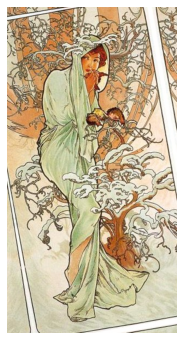

In [ ]:
visualize_image(aug_img)

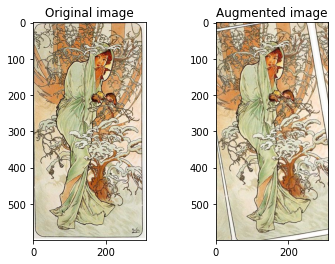

In [ ]:
visualize_2images(winter, aug_img)

In [ ]:
images_list_aug_alb=[]
for i in range(10):
  images_list_aug_alb.append(aug_fn(winter))


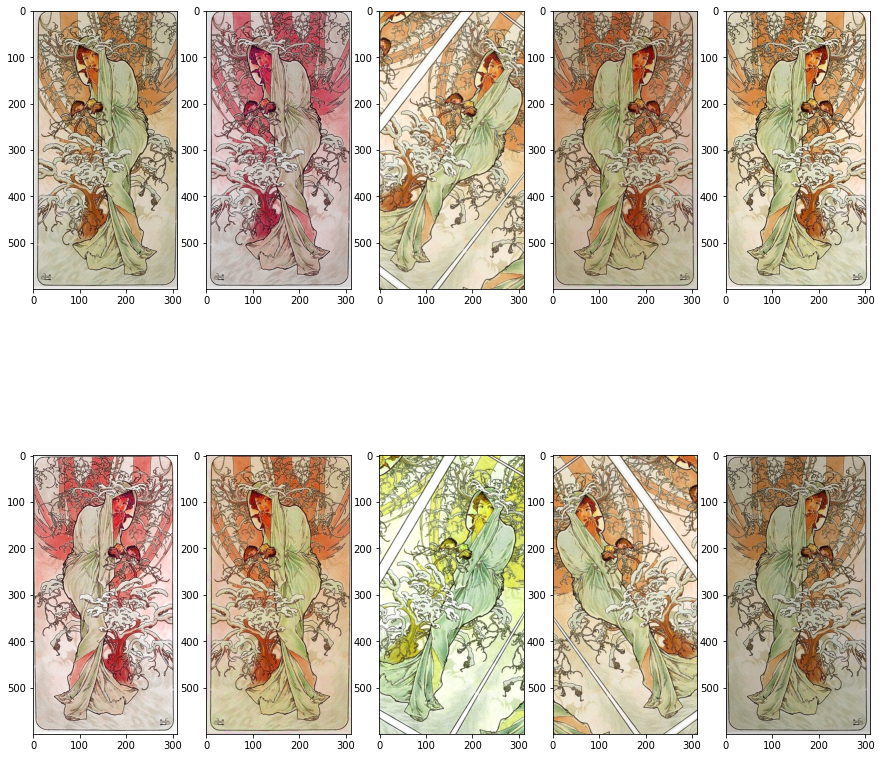

In [ ]:
visualize_images(images_list_aug_alb, 10)

# tf.image

https://www.tensorflow.org/api_docs/python/tf/image

## `tf.image.flip_left_right `


---



Flip an image horizontally (left to right).

Outputs the contents of image flipped along the width dimension.

```
tf.image.flip_left_right(
    image
)

```


#### Args
##### image 
- 4-D Tensor of shape *[batch, height, width, channels] *or 3-D Tensor of shape *[height, width, channels]*. 

#### Returns
- A tensor of the same type and shape as image. 

---

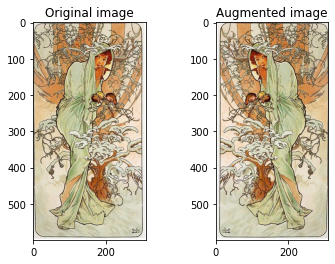

In [ ]:
flipped = tf.image.flip_left_right(winter)
visualize_2images(winter, flipped)

## `tf.image.rgb_to_grayscale`


---
Converts one or more images from RGB to Grayscale.

Outputs a tensor of the same DType and rank as images. The size of the last dimension of the output is 1, containing the Grayscale value of the pixels.

```
tf.image.rgb_to_grayscale(
    images, name=None
)
```

#### Args

##### images 	
- The RGB tensor to convert. The last dimension must have size 3 and should contain RGB values.

##### name 	
- A name for the operation (optional).

#### Returns
The converted grayscale image(s). 


---



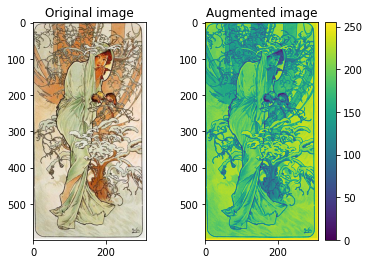

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(winter)
visualize_2images(winter, tf.squeeze(grayscaled))
_ = plt.colorbar()

## `tf.image.adjust_saturation`


---
Adjust saturation of RGB images.

This is a convenience method that converts RGB images to float representation, converts them to HSV, adds an offset to the saturation channel, converts back to RGB and then back to the original data type. If several adjustments are chained it is advisable to minimize the number of redundant conversions.

```
tf.image.adjust_saturation(
    image, saturation_factor, name=None
)
```
#### Args

##### image 	
- RGB image or images. The size of the last dimension must be 3.

##### saturation_factor 	
- float. Factor to multiply the saturation by.

##### name 	
- A name for this operation (optional).

#### Returns
- Adjusted image(s), same shape and DType as image. 


---



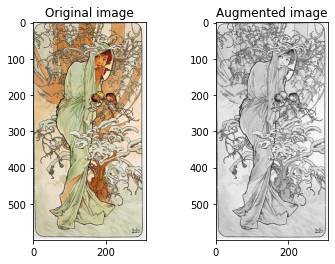

In [ ]:
saturated = tf.image.adjust_saturation(winter, -1000)
visualize_2images(winter, saturated)

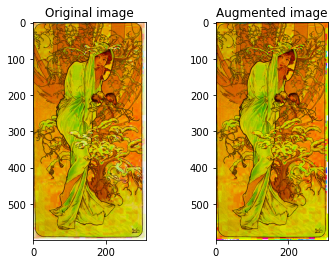

In [ ]:
saturated1 = tf.image.adjust_saturation(winter, 10)
saturated2 = tf.image.adjust_saturation(winter, 300000)
visualize_2images(saturated1, saturated2)

## `tf.image.adjust_brightness`


---
Adjust the brightness of RGB or Grayscale images.

This is a convenience method that converts RGB images to float representation, adjusts their brightness, and then converts them back to the original data type. If several adjustments are chained, it is advisable to minimize the number of redundant conversions.

```
tf.image.adjust_brightness(
    image, delta
)
```

#### Args
##### image 	
- RGB image or images to adjust. *[image in floating point representation, where pixel values are in the [0,1) range.]*

##### delta 	
- A scalar. Amount to add to the pixel values. *[delta should be in the range (-1,1)]*

#### Returns
- A brightness-adjusted tensor of the same shape and type as image. 

---



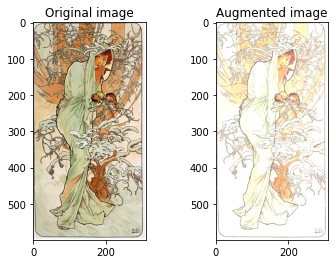

In [ ]:
bright = tf.image.adjust_brightness(winter, 0.4)
visualize_2images(winter, bright)

## `tf.image.central_crop`


---

Crop the central region of the image(s).

Remove the outer parts of an image but retain the central region of the image along each dimension. If we specify central_fraction = 0.5, this function returns the region marked with "X" in the below diagram.

```
 --------
|        |
|  XXXX  |
|  XXXX  |
|        |   where "X" is the central 50% of the image.
 --------
```

```
tf.image.central_crop(
    image, central_fraction
)
```

### Args
####image 	
- Either a 3-D float Tensor of shape [height, width, depth], or a 4-D Tensor of shape [batch_size, height, width, depth]. *ValueError 	if central_crop_fraction is not within (0, 1].*

#### central_fraction 	
- float (0, 1], fraction of size to crop

### Returns
- 3D / 4-D float Tensor, as per the input. 
---



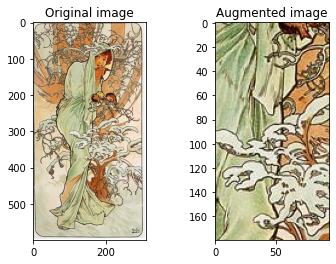

In [ ]:
cropped = tf.image.central_crop(winter, central_fraction=0.3)
visualize_2images(winter, cropped)

## tf.image.rot90


---

Rotate image(s) counter-clockwise by 90 degrees.

```
tf.image.rot90(
    image, k=1, name=None
)
```

#### Args
##### image 	
- 4-D Tensor of shape [batch, height, width, channels] or 3-D Tensor of shape [height, width, channels].

##### k 	
- A scalar integer. The number of times the image is rotated by 90 degrees. e.g. k=3*90=>270 

##### name 	
- A name for this operation (optional).

#### Returns
- A rotated tensor of the same type and shape as image. 

---



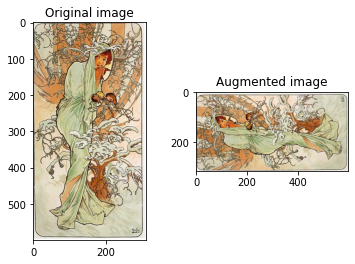

In [ ]:
rotated = tf.image.rot90(winter, k=5)
visualize_2images(winter, rotated)

## `tf.image.adjust_gamma`


---
on the input image.

Also known as Power Law Transform. This function converts the input images at first to float representation, then transforms them pixelwise according to the equation Out = gain * In**gamma, and then converts the back to the original data type.

```
tf.image.adjust_gamma(
    image, gamma=1, gain=1
)
```

#### Args

##### image 	
- RGB image or images to adjust.

##### gamma 	
- A scalar or tensor. Non-negative real number.

##### gain 	
- A scalar or tensor. The constant multiplier.

#### Returns
- A Tensor. A Gamma-adjusted tensor of the same shape and type as image. 

*gamma not negative* 

---



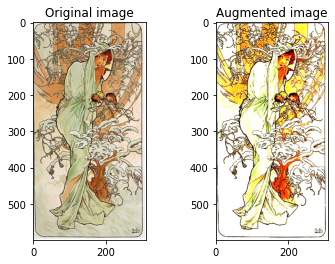

In [ ]:
gammed = tf.image.adjust_gamma(winter, gamma=3, gain=5)
visualize_2images(winter, gammed)

## `tf.image.adjust_contrast`


---
Adjust contrast of RGB or grayscale images.

```
tf.image.adjust_contrast(
    images, contrast_factor
)

```

#### Args
##### images 	
- Images to adjust. At least 3-D.

##### contrast_factor 	
- A float multiplier for adjusting contrast.

#### Returns
- The contrast-adjusted image or images. 


*For each channel, this Op computes the mean of the image pixels in the channel and then adjusts each component x of each pixel to (x - mean) * contrast_factor + mean.*

---



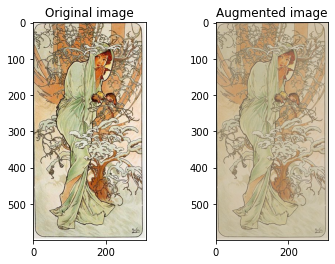

In [ ]:
contrasted = tf.image.adjust_contrast(winter, 0.5)
visualize_2images(winter, contrasted)

## `tf.image.adjust_hue`


---
Adjust hue of RGB images.

```
tf.image.adjust_hue(
    image, delta, name=None
)
```

#### Args
##### image 	
- RGB image or images. The size of the last dimension must be 3.

##### delta 	
- float. How much to add to the hue channel.

##### name 	
- A name for this operation (optional).

#### Returns
-Adjusted image(s), same shape and DType as image. 


---



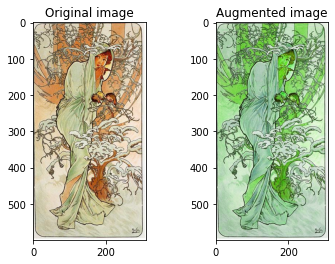

In [ ]:
hued=tf.image.adjust_hue(winter, 0.2)
visualize_2images(winter, hued)

## `tf.image.adjust_jpeg_quality`



---
Adjust jpeg encoding quality of an image.

```
tf.image.adjust_jpeg_quality(
    image, jpeg_quality, name=None
)

```

#### Args
##### image 	
- 3D image. The size of the last dimension must be None, 1 or 3.

#####jpeg_quality 	
- Python int or Tensor of type int32. jpeg encoding quality. (quality must be in [0,100])

#####name 	
- A name for this operation (optional).

#### Returns
- Adjusted image, same shape and DType as image.





---



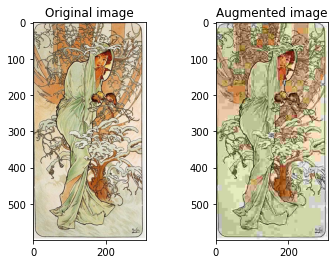

In [ ]:
qualited = tf.image.adjust_jpeg_quality(winter, 5)
visualize_2images(winter, qualited)



---



---



---



---



## SEED

```
tf.random.set_seed(
    seed
)
```

#### Args

##### seed 
-	integer. 



---



---



In [ ]:
tf.random.set_seed(1234)

seed=(3,0)




---



---



## `tf.image.stateless_random_brightness`


---


```
tf.image.stateless_random_brightness(
    image, max_delta, seed
)
```
**image** -	An image or images to adjust.

**max_delta** -	float, must be non-negative.

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.) 

*max_delta not negative*

---



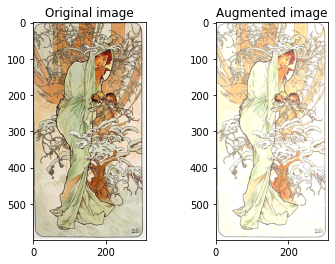

In [ ]:
rand_bri=tf.image.stateless_random_brightness(winter, random.random(), seed)
visualize_2images(winter, rand_bri)

## `tf.image.stateless_random_contrast`


---

```
tf.image.stateless_random_contrast(
    image, lower, upper, seed
)
```

**image** -	An image tensor with 3 or more dimensions.

**lower** -	float. Lower bound for the random contrast factor.

**upper** -	float. Upper bound for the random contrast factor.

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.) 

*upper > lower and lower > 0*

---






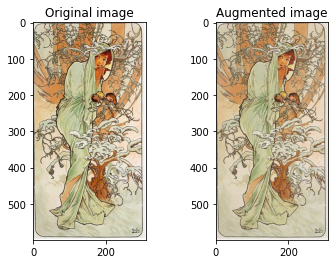

In [ ]:
rand_cont=tf.image.stateless_random_contrast(winter, 0, random.random(), seed)
visualize_2images(winter, rand_cont)

## `tf.image.stateless_random_crop`


---



```
tf.image.stateless_random_crop(
    value, size, seed, name=None
)
```

**value** -	Input tensor to crop.

**size** -	1-D tensor with size the rank of value.

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.)

**name** -	A name for this operation (optional). 



---




In [ ]:
IMG_SIZE = 180

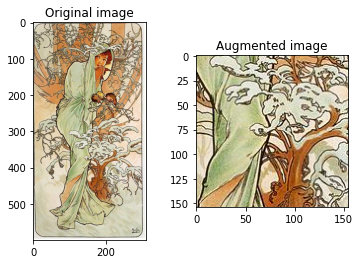

In [ ]:
rand_crop=tf.image.stateless_random_crop(winter, size=(random.randint(10, IMG_SIZE), random.randint(10, IMG_SIZE), 3), seed=seed)
visualize_2images(winter, rand_crop)

## `tf.image.stateless_random_flip_left_right`


---

```
tf.image.stateless_random_flip_left_right(
    image, seed
)
```
**image** -	4-D Tensor of shape [batch, height, width, channels] or 3-D Tensor of shape [height, width, channels].

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.) 

---



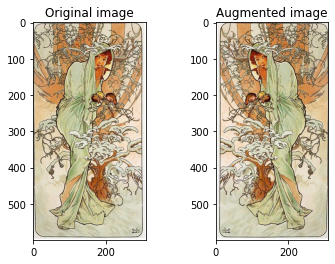

In [ ]:
rand_flip=tf.image.stateless_random_flip_left_right(winter, seed)
visualize_2images(winter, rand_flip)

## `tf.image.stateless_random_flip_up_down`

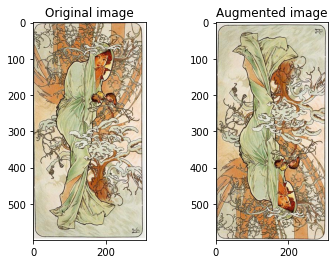

In [ ]:
rand_flip2=tf.image.stateless_random_flip_up_down(winter, seed)
visualize_2images(winter, rand_flip2)

## `tf.image.stateless_random_hue`


---
```
tf.image.stateless_random_flip_up_down(
    image, seed
)
```

**image** -	4-D Tensor of shape [batch, height, width, channels] or 3-D Tensor of shape [height, width, channels].

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.) 

---



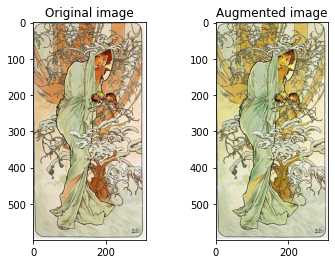

In [ ]:
rand_hue=tf.image.stateless_random_hue(winter, random.uniform(0, 0.5), seed)
visualize_2images(winter, rand_hue)

## `tf.image.stateless_random_jpeg_quality`


---
```
tf.image.stateless_random_jpeg_quality(
    image, min_jpeg_quality, max_jpeg_quality, seed
)
```
**image** -	3D image. Size of the last dimension must be 1 or 3.

**min_jpeg_quality** -	Minimum jpeg encoding quality to use.

**max_jpeg_quality** -	Maximum jpeg encoding quality to use.

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.) 

*min_jpeg_quality must be in the interval [0, 100] and less than max_jpeg_quality. max_jpeg_quality must be in the interval [0, 100]*

---



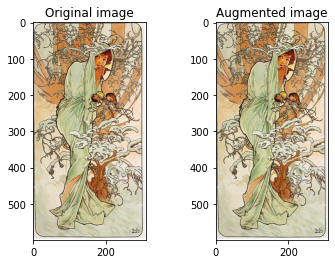

In [ ]:
rand_qual=tf.image.stateless_random_jpeg_quality(winter, random.randint(0, 30), random.randint(31, 100), seed)
visualize_2images(winter, rand_qual)

## `tf.image.stateless_random_saturation`


---

```
tf.image.stateless_random_saturation(
    image, lower, upper, seed=None
)
```

**image** -	RGB image or images. The size of the last dimension must be 3.

**lower** -	float. Lower bound for the random saturation factor.

**upper** -	float. Upper bound for the random saturation factor.

**seed** -	A shape [2] Tensor, the seed to the random number generator. Must have dtype int32 or int64. (When using XLA, only int32 is allowed.) 


*upper > lower and  lower > 0*

---



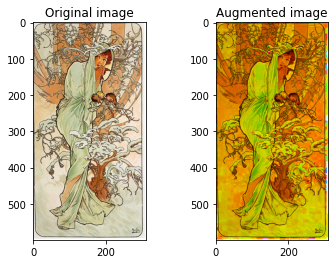

In [ ]:
rand_sat=tf.image.stateless_random_saturation(winter, random.randint(0, 30), random.randint(31, 100), seed)
visualize_2images(winter, rand_sat)

## Basic on th.image function to generate augumentation

In [ ]:
def rand_brit(image, seed):
  return tf.image.stateless_random_brightness(image, random.random(), seed)
def rand_cont(image, seed):
  return tf.image.stateless_random_contrast(image, 0, random.random(), seed)
def rand_crop(image, seed):
  return tf.image.stateless_random_crop(image, size=(random.randint(10, IMG_SIZE), random.randint(10, IMG_SIZE), 3), seed=seed)
def rand_flip_hor(image, seed):
  return tf.image.stateless_random_flip_left_right(image, seed)
def rand_flip_ver(image, seed):
  return tf.image.stateless_random_flip_up_down(image, seed)
def rand_hue(image, seed):
  return tf.image.stateless_random_hue(image, random.uniform(0, 0.5), seed)
def rand_qual(image, seed):
  return tf.image.stateless_random_jpeg_quality(image, random.randint(0, 30), random.randint(31, 100), seed)
def rand_sat(image, seed):
  return tf.image.stateless_random_saturation(image,random.randint(0, 30), random.randint(31, 100), seed)

In [ ]:
# generate_image_with_random_transformation 
def gen_img_rand_trans(image, seed=(3,0)):
  i = random.randint(1, 15)
  return {
    1: rand_brit(image, seed),
    2: rand_cont(image, seed),
    3: rand_crop(image, seed),
    4: rand_flip_hor(image, seed),
    5: rand_flip_ver(image, seed),
    6: rand_hue(image, seed),
    7: rand_qual(image, seed),
    8: rand_sat(image, seed),
    9: rand_brit(rand_cont(image, seed), seed), # connections...
    10: rand_flip_hor(rand_sat(rand_brit(image, seed), seed), seed),
    11: rand_crop(rand_hue(rand_cont(image, seed), seed), seed),
    12: rand_hue(rand_qual(rand_sat(rand_cont(rand_brit(rand_flip_hor(image, seed), seed), seed), seed), seed), seed),
    13: rand_flip_ver(rand_flip_hor(rand_cont(rand_qual(image, seed), seed), seed), seed),
    14: rand_crop(rand_brit(rand_qual(image, seed), seed), seed),
    15: rand_qual(rand_brit(rand_cont(rand_hue(rand_sat(image, seed), seed), seed), seed), seed)
    }[i]

In [ ]:
images_list_aug_tf=[]
for i in range(10):
  images_list_aug_tf.append(gen_img_rand_trans(winter))

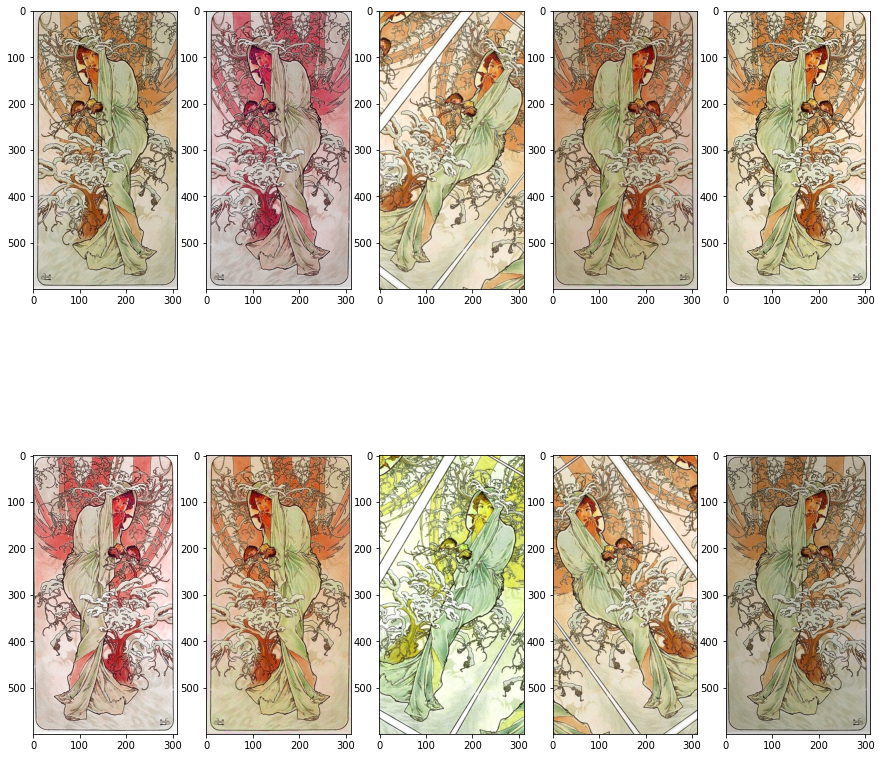

In [ ]:
visualize_images(images_list_aug_alb,10)

# Keras preprocessing

 Keras has a variety of preprocessing layers that may be used for Data Augmentation. You can apply them as follows.

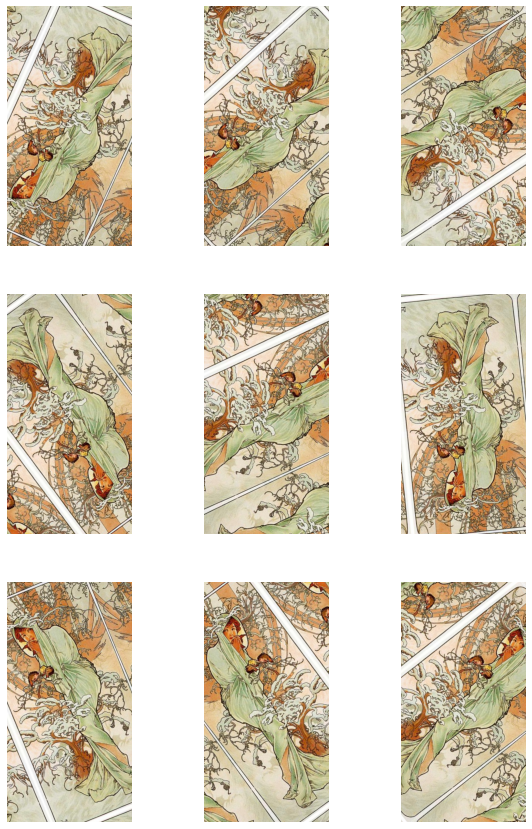

In [ ]:
data_augmentation = tf.keras.Sequential([
     tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)])

plt.figure(figsize=(10, 15))

for i in range(9):
  augmented_image = data_augmentation(winter)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image)
  plt.axis("off")

# Keras ImageDataGenerator

Also, you may use ImageDataGenerator (tf.keras.preprocessing.image.ImageDataGenerator) that generates batches of tensor images with real-time DA.

```
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)
```

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import img_to_array


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


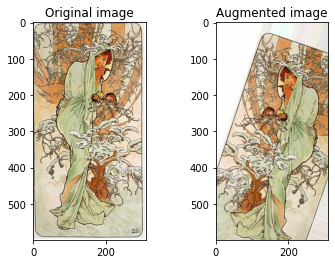

In [ ]:
#https://machinelearningknowledge.ai/keras-imagedatagenerator-for-image-augmentation/
# For processing, we are converting the image(s) to an array
data = img_to_array(winter)

# Expanding dimension to one sample
samples = np.expand_dims(data, 0)

# Creating an iterator for data augmentation
it = datagen.flow(samples, batch_size=1)

datagen = ImageDataGenerator(
  featurewise_center=True,
  featurewise_std_normalization=True,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True,
  validation_split=0.2)

batch = it.next()
imgDatGen = batch[0].astype('uint8')

visualize_2images(winter, imgDatGen)


# Data Augmentation in Tensorflow Object Detection API

In [ ]:
train_config: {
batch_size: 1


data_augmentation_options {
random_horizontal_flip {
#keeping Defaults
}
random_vertical_flip{
#keeping defaults
}
random_rotation90{
#keeping defaults
}
random_adjust_brightness{
max_delta: 0.1
}
random_adjust_contrast{
min_delta: 0.001,
max_delta: 0.1
}
}
}

# Data Augmentation in PyTorch and MxNet NOT DONE

https://neptune.ai/blog/data-augmentation-in-python
`pip3 install torch torchvision`

```
from torchvision import transforms as tr
from torchvision.transfroms import Compose

pipeline = Compose(
             [tr.RandomRotation(degrees = 90),
              tr.RandomRotation(degrees = 270)])

augmented_image = pipeline(img = img)
```

```
color_aug = transforms.RandomColorJitter(
                               brightness=0.5,
                               contrast=0.5,
                               saturation=0.5,
                               hue=0.5)
apply(example_image, color_aug)
```

# Image Data Augmentation libraries



1.    Augmentor
2.    Albumentations
3.    Imgaug
4.    AutoAugment (DeepAugment)



## Augmentor

`pip install Augmentor`

```
import Augmentor

p = Augmentor.Pipeline("/path/to/images")
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.3, min_factor=1.1, max_factor=1.6)
p.sample(10000)
```

## Albumentations

`pip install albumentations`

```
import albumentations as A
import cv2

def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

image = cv2.imread('/path/to/image')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

transform = A.Compose(
    [A.CLAHE(),
     A.RandomRotate90(),
     A.Transpose(),
     A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.50,
                        rotate_limit=45, p=.75),
     A.Blur(blur_limit=3),
     A.OpticalDistortion(),
     A.GridDistortion(),
     A.HueSaturationValue()])

augmented_image = transform(image=image)['image']
visualize(augmented_image)
```

## ImgAug

`pip install imgaug`

```
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    		iaa.Crop(px=(0, 16)),
    		iaa.Fliplr(0.5),
    		iaa.GaussianBlur(sigma=(0, 3.0))])

for batch_idx in range(1000):
    		images = load_batch(batch_idx)
    		images_aug = seq(images=images)
```

## Autoaugment

`pip install deepaugment`

```
from deepaugment.deepaugment import DeepAugment

deepaug = DeepAugment(my_images, my_labels)
best_policies = deepaug.optimize(300)
```

# numpy

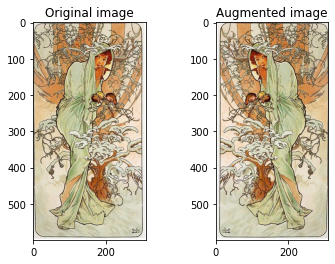

In [ ]:
# NumPy.'img' = A single image.
flip_1 = np.fliplr(winter)
visualize_2images(winter, flip_1)

# preprocessor.proto

https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto

https://github.com/tensorflow/models/blob/master/research/object_detection/core/preprocessor.py

Mor links

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image

https://www.reddit.com/r/tensorflow/comments/kqox4g/adding_augmentations_to_tensorflow_object/


https://discuss.tensorflow.org/t/changing-augmentation-parameters-in-tfod-api/6935/3

https://stackoverflow.com/questions/44906317/what-are-possible-values-for-data-augmentation-options-in-the-tensorflow-object

https://neptune.ai/blog/data-augmentation-in-python